In [174]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-books-10k-multi-genre-data/goodreads_data.csv


# Loading the data

In [175]:
import pandas as pd

In [176]:
df=pd.read_csv("/kaggle/input/best-books-10k-multi-genre-data/goodreads_data.csv")

In [177]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


### dropping useless columns

In [178]:
df=df.drop(columns='Unnamed: 0',axis=1)

### exploring the data

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book         10000 non-null  object 
 1   Author       10000 non-null  object 
 2   Description  9923 non-null   object 
 3   Genres       10000 non-null  object 
 4   Avg_Rating   10000 non-null  float64
 5   Num_Ratings  10000 non-null  object 
 6   URL          10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [180]:
df.shape

(10000, 7)

In [181]:
df.isnull().sum()

Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

In [182]:
df.duplicated().sum()

0

In [183]:
df=df.dropna(axis=0)

In [184]:
df['Genres'].value_counts()

Genres
[]                                                                                                                     923
['Fiction']                                                                                                             48
['Fantasy']                                                                                                             41
['Nonfiction']                                                                                                          21
['Romance']                                                                                                             20
                                                                                                                      ... 
['Nonfiction', 'Memoir', 'Biography', 'Spanish Literature', 'Biography Memoir', 'Magical Realism', 'Autobiography']      1
['Plays', 'Drama', 'Fiction', 'Classics', 'Theatre', 'School', 'Psychology']                                             1
['Fiction

In [185]:
df = df[df['Genres'].apply(lambda x: len(x) > 2)] # dropping off rows with null genres

### handling fake lists 

In [186]:
import ast

def parse_list(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x

df['Genres'] = df['Genres'].apply(parse_list)

# visualization 

In [187]:
df_exploded = df.explode('Genres')


In [189]:
df_exploded['Genres'] = df_exploded['Genres'].str.strip()

In [190]:
df_exploded['Genres'].unique()

array(['Classics', 'Fiction', 'Historical Fiction', 'School',
       'Literature', 'Young Adult', 'Historical', 'Fantasy', 'Magic',
       'Childrens', 'Middle Grade', 'Romance', 'Audiobook', 'Nonfiction',
       'History', 'Biography', 'Memoir', 'Holocaust', 'Dystopia',
       'Politics', 'France', 'Philosophy', 'Science Fiction', 'Novels',
       'Coming Of Age', 'Adventure', 'Science Fiction Fantasy',
       'Epic Fantasy', 'High Fantasy', 'War', 'World War II', 'Gothic',
       'Christian', 'Read For School', 'Plays', 'Drama', 'Contemporary',
       'Picture Books', 'Poetry', 'Animals', 'Humor', '19th Century',
       'Horror', 'Religion', 'Christianity', 'Comedy', 'Theatre',
       'Essays', 'Fairy Tales', 'Literary Criticism', 'Writing',
       'Spirituality', 'Self Help', 'Russia', 'Russian Literature',
       'Adult', 'Adult Fiction', 'Japan', 'Mythology', 'Christmas',
       'Realistic Fiction', 'Magical Realism', 'American', 'Feminism',
       'LGBT', 'African American', 'Psy

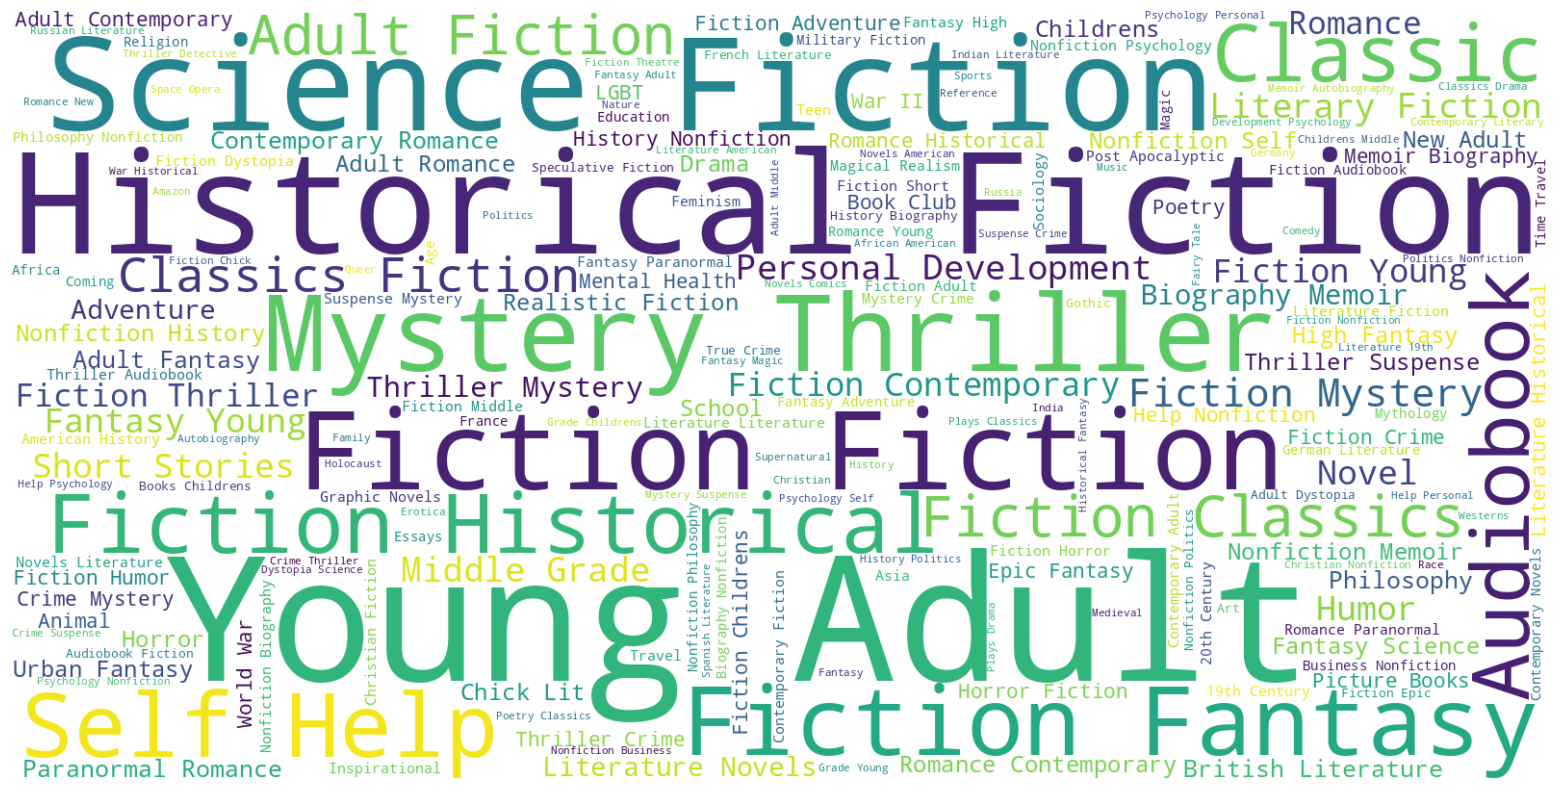

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_genres = df_exploded['Genres'] 

text = " ".join(all_genres)

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


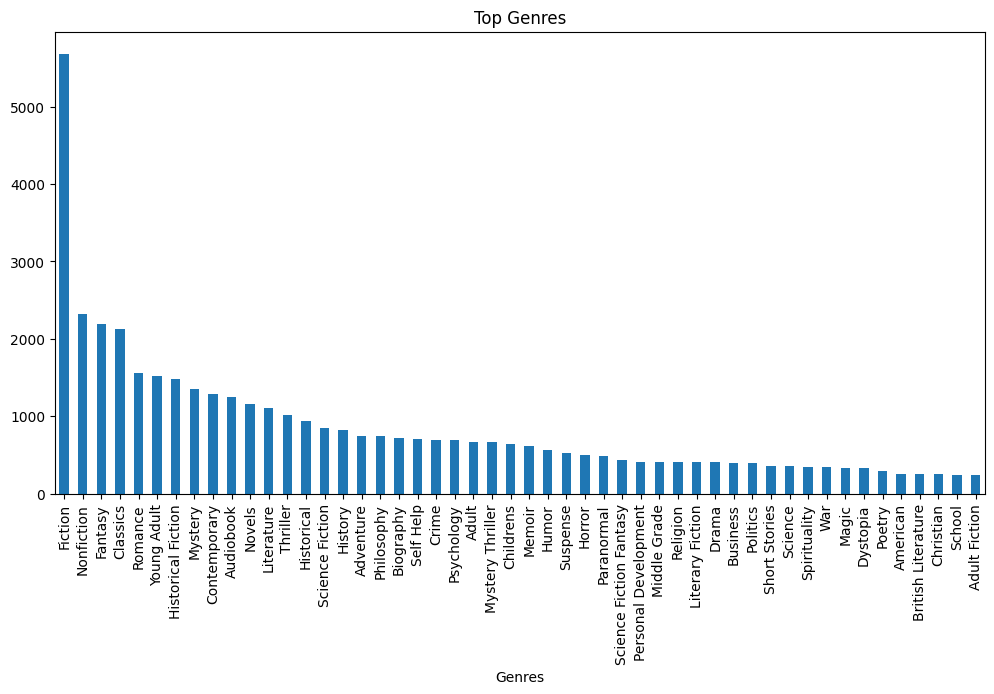

In [192]:
df_exploded = df.explode('Genres')
df_exploded['Genres'].value_counts().head(50).plot(kind='bar', figsize=(12,6))
plt.title("Top Genres")
plt.show()

In [193]:
df_exploded['Num_Ratings'].value_counts()

Num_Ratings
107      51
100      49
64       44
24       40
117      39
         ..
393       1
280       1
1,667     1
286       1
487       1
Name: count, Length: 7515, dtype: int64

In [194]:
df["Num_Ratings"] = (
    df["Num_Ratings"].astype(str)      
    .str.replace(",", "", regex=False)         
)

df["Num_Ratings"] = pd.to_numeric(
    df["Num_Ratings"]
)

In [195]:
df['Num_Ratings'].dtype

dtype('int64')

In [196]:
df=df.drop(columns='URL',axis=1)

In [197]:
df = df.reset_index(drop=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book         9000 non-null   object 
 1   Author       9000 non-null   object 
 2   Description  9000 non-null   object 
 3   Genres       9000 non-null   object 
 4   Avg_Rating   9000 non-null   float64
 5   Num_Ratings  9000 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 422.0+ KB


# making the dataset suitable for nlp tasks 

In [199]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genres'])

genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

df = pd.concat([df, genre_df], axis=1)

In [200]:
df["Author_Encoded"] = df.groupby("Author")["Avg_Rating"].transform("mean")

In [201]:
num_features = ["Avg_Rating", "Num_Ratings"]
scaler = StandardScaler()

scaled_num = scaler.fit_transform(df[num_features])


scaled_num_df = pd.DataFrame(
    scaled_num, 
    columns=[f"scaled_{c}" for c in num_features],
    index=df.index 
)

### cleaning description for emmbedings

In [202]:
import re
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"<.*?>", "", text)        
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text) 
    text = text.lower().strip()
    return text

df["Description"] = df["Description"].apply(clean_text)

## Sentence-BERT embeddings

In [203]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(df["Description"].tolist(), show_progress_bar=True)

embeddings_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])


Batches:   0%|          | 0/282 [00:00<?, ?it/s]

In [204]:
df_scaled_num=pd.concat([scaled_num_df,genre_df,embeddings_df,df["Author_Encoded"]], axis=1)
df_has_cat= df.select_dtypes(include=['object', 'category'])

In [206]:
print(df_scaled_num.columns)

Index(['scaled_Avg_Rating', 'scaled_Num_Ratings', '12th Century',
       '15th Century', '16th Century', '17th Century', '18th Century',
       '19th Century', '20th Century', '21st Century',
       ...
       'emb_375', 'emb_376', 'emb_377', 'emb_378', 'emb_379', 'emb_380',
       'emb_381', 'emb_382', 'emb_383', 'Author_Encoded'],
      dtype='object', length=1004)


In [207]:
print(df_has_cat.columns)

Index(['Book', 'Author', 'Description', 'Genres'], dtype='object')


In [208]:
import joblib
import pickle

df_scaled_num.to_pickle("processed_data.pkl")
df_has_cat.to_pickle("cat_data.pkl")
joblib.dump(scaler, "my_scaler.pkl")

['my_scaler.pkl']